# Predicting Effective Arguments

![](http://images.unsplash.com/photo-1550592704-6c76defa9985?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8c3R1ZGVudCUyMHdyaXRpbmd8ZW58MHx8MHx8&w=1000&q=80)

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4a8fdd;font-family:newtimeroman;color:#FFF9ED;font-size:300%;text-align:center;border-radius:9px 9px;">TABLE OF CONTENTS</p>   
    
* [1. INTRODUCTION](#1)
    
* [2. IMPORTING NECESSARY LIBRARIES](#2)
    
* [3. LOADING DATASET](#3)
    
    * [3.1. Look at Train Dataset](#3.1)   
    * [3.2. Look at Test Dataset](#3.2)
    * [3.3. Look at Submission Sample](#3.3)
    * [3.4. Get Train and Test Datasets Shape](#3.4)
  
    
* [4. DATA VISUALIZATION and INITIAL INFORMATION ABOUT DATASET](#4)
    
    * [4.1. Columns Values Count](#4.1)    
    * [4.2. Distplot](#4.2)    
    * [4.3. Word Cloud](#4.3)    
    * [4.4. Pie Chart](#4.4)
    * [4.5. Give Numbers to Categorical Variable ](#4.5)  
    * [4.6. Boxplot](#4.6)    

        
* [5. WORD PROCESSING](#5)
    
    * [5.1. Main Operations on Text Values](#5.1)    
    * [5.2. Count Words](#5.2)    
    * [5.3. Convert Apostrophes](#5.3)    
    * [5.4. Split Train and Test Datasets and Target](#5.4)
    
    
    
* [6. LOGISTIC REGRESSION and XGBoost with TfidfVectorizer Method](#6)
    
    * [6.1. Tfidf Vectorizer Operations](#6.1)    
    * [6.2. Logistic Regression](#6.2)    
    * [6.3. Extreme Gradient Boosting](#6.3)
    

* [7. LOGISTIC REGRESSION and XGBoost with CountVectorizer Method](#7)
    
    * [7.1. Count Vectorizer Operations](#7.1)    
    * [7.2. Logistic Regression](#7.2)    
    * [7.3. Extreme Gradient Boosting](#7.3)
    
    
* [8. USE XGBOOST MODEL ON TFIDFVECTORIZER METHOD](#8)
    
    * [8.1. Make Prediction](#8.1)    
    * [8.2. Create Dataframe on Predictions](#8.2)    
    * [8.3. Give Titles to Columns of New Dataframe](#8.3)
    * [8.4. Create Submission File](#8.4)

  

<a id="1"></a>

## <b>1 <span style='color:#4a8fdd'>|</span> INTRODUCTION</b>

[Feedback Prize Effectiveness Competition](http://www.kaggle.com/competitions/feedback-prize-effectiveness)

<a id="2"></a>

## <b>2 <span style='color:#4a8fdd'>|</span> IMPORTING NECESSARY LIBRARIES</b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#text processing
import re
from wordcloud  import WordCloud
from textblob import TextBlob
import textblob, string
from sklearn import model_selection, preprocessing, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter
from itertools import chain

#ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

#to see all parametres of model
from sklearn import set_config
set_config(print_changed_only = False)

#if we want to see full text:
#pd.set_option("display.max_colwidth", -1)

<a id="3"></a>

## <b>3 <span style='color:#4a8fdd'>|</span> LOADING DATASET</b>

In [ ]:
train = pd.read_csv("../input/feedback-prize-effectiveness/train.csv")
test = pd.read_csv("../input/feedback-prize-effectiveness/test.csv")
submission_sample = pd.read_csv("../input/feedback-prize-effectiveness/sample_submission.csv")

<a id="3.1"></a>

#### <b>3.1 <span style='color:#4a8fdd'>|</span> Look at Train Dataset</b>

In [ ]:
train.head()

<a id="3.2"></a>

#### <b>3.2 <span style='color:#4a8fdd'>|</span> Look at Test Dataset</b>

In [ ]:
test

<a id="3.3"></a>

#### <b>3.3 <span style='color:#4a8fdd'>|</span> Look at Submission Sample</b>

In [ ]:
submission_sample

<a id="3.4"></a>

#### <b>3.4 <span style='color:#4a8fdd'>|</span> Get Train and Test Datasets Shape</b>

In [ ]:
print(train.shape)
print(test.shape)

<a id="4"></a>

## <b>4 <span style='color:#4a8fdd'>|</span> DATA VISUALIZATION and INITIAL INFORMATION ABOUT DATASET</b> 

<a id="4.1"></a>

#### <b>4.1 <span style='color:#4a8fdd'>|</span> Columns Values Count</b>

In [ ]:
train.groupby("discourse_type").count()

In [ ]:
train.groupby("discourse_effectiveness").count()

In [ ]:
#get number of the classes of 'discourse_effectiveness' variable
print(train["discourse_effectiveness"].value_counts(), '\n\n')

#get number of the classes of 'discourse_type' variable
print(train["discourse_type"].value_counts())

<a id="4.2"></a>

#### <b>4.2 <span style='color:#4a8fdd'>|</span> Distplot</b>

In [ ]:
sns.displot(train["discourse_effectiveness"], color = "#8a3cf1", height = 5, aspect = 1);

In [ ]:
sns.displot(train["discourse_type"], height = 5, color = "#97E724", aspect = 2);

<a id="4.3"></a>

#### <b>4.3 <span style='color:#4a8fdd'>|</span> Word Cloud</b>

In [ ]:
fig, ax = plt.subplots(7, 3, sharex = "col", sharey = "row", figsize = (20, 20))
for i, disty in enumerate(train["discourse_type"].unique()):
    for j, effect in enumerate(set(train["discourse_effectiveness"].values)):
            word_cloud = WordCloud(background_color = "white").generate(str(train.query(f'discourse_type == "{disty}" and discourse_effectiveness=="{effect}"')['discourse_text']))
            ax[i,j].imshow(word_cloud)
            ax[i,j].axis("off");
            ax[i,j].set_title(f'{effect } {disty}', fontsize = 20);

            
plt.show()

<a id="4.4"></a>

#### <b>4.4 <span style='color:#4a8fdd'>|</span> Pie Chart</b>

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

data = train["discourse_type"].value_counts()
labels = train["discourse_type"].value_counts().index
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, radius = 1.2,
        shadow = False,
        pctdistance=0.5,
        colors = colors,
        autopct='%.0f%%');

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

data = train["discourse_effectiveness"].value_counts()
labels = train["discourse_effectiveness"].value_counts().index
colors = ["#570990","#e4b6fe",'#8b22ba', "#8a3cf6"]    


#create pie chart
plt.pie(data, labels = labels, radius = 1.2,
        shadow = False,
        pctdistance=0.5,
        colors = colors,
        autopct='%.0f%%');

<a id="4.5"></a>

#### <b>4.5 <span style='color:#4a8fdd'>|</span> Give Numbers to Categorical Variable </b>

In [ ]:
train["discourse_effectiveness"].replace("Effective", value = 1, inplace = True)
train["discourse_effectiveness"].replace("Adequate", value = 2, inplace = True)
train["discourse_effectiveness"].replace("Ineffective", value = 3, inplace = True)

train.head(n = 10)

<a id="4.6"></a>

#### <b>4.6 <span style='color:#4a8fdd'>|</span> Boxplot </b>

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxplot("discourse_effectiveness", data = train, saturation = 1, color = "#E668F5",  width = 0.4, ax = ax);

<a id="5"></a>

## <b>5 <span style='color:#4a8fdd'>|</span> WORD PROCESSING</b> 

<a id="5.1"></a>

#### <b>5.1 <span style='color:#4a8fdd'>|</span> Main Operations on Text Values </b>

In [ ]:
#select target variable
target_var = train["discourse_effectiveness"]

#add test dataset to train dataset and implement text processing operations for both (test and train)
train_test = train.drop(["discourse_effectiveness"], axis = 1).append(test)

In [ ]:
text = train_test["discourse_text"] + train_test["discourse_type"]
text.head(3)

In [ ]:
#upper - lower letter conversion
text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))


#remove punctuation marks
text = text.str.replace('[^\w\s]','')


#remove numbers
text = text.str.replace('\d','')


#remove stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
text = text.apply(lambda x: " ".join(x for x in x.split() if x not in sw))


#remove infrequent words
remove = pd.Series(' '.join(text).split()).value_counts()[-1000:]
text = text.apply(lambda x: " ".join(x for x in x.split() if x not in remove))


#lemmatization
from textblob import Word
#nltk.download('wordnet')
text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


#remove hash tags
text = text.str.replace("#", " ")


#remove words less than two characters
text = text.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))


#remove special characters and numbers
text = text.apply(lambda x : re.sub("[^a-z\s]","", x))


#remove rare words
text_list = text.str.split().tolist()
#compute global word frequency
c = Counter(chain.from_iterable(text_list))

text = [' '.join([j for j in i if c[j] > 1]) for i in text_list]

In [ ]:
#change type from list to pd Series
text = pd.Series(text)
type(text)

In [ ]:
text.head()

<a id="5.2"></a>

#### <b>5.2 <span style='color:#4a8fdd'>|</span> Count Words</b>

In [ ]:
cw = text.str.findall(r'(\w+)').str.len()
print(cw.sum())

<a id="5.3"></a>

#### <b>5.3 <span style='color:#4a8fdd'>|</span> Convert Apostrophes</b>

In [ ]:
apostrophes = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def look_at_dict(txt, dictionary):
    for word in txt.split():
        if word.lower() in dictionary:
            if word.lower() in txt.split():
                txt = txt.replace(word, dictionary[word.lower()])
    return txt

text = text.apply(lambda x: look_at_dict(x, apostrophes))

text.head()

<a id="5.4"></a>

#### <b>5.4 <span style='color:#4a8fdd'>|</span> Split Train and Test Datasets and Target </b>

In [ ]:
x_train = text[: len(train)]
y_train = pd.get_dummies(target_var)
x_test = text[len(train):]

In [ ]:
x_train.head()

In [ ]:
y_train.head()

In [ ]:
x_test

<a id="6"></a>

## <b> 6 <span style='color:#4a8fdd'>|</span>Logistic Regression and XGBoost with TfidfVectorizer Method</b> 

<a id="6.1"></a>

#### <b>6.1<span style='color:#4a8fdd'>|</span> Tfidf Vectorizer Operations </b>

In [ ]:
vectorizer_tfidf = TfidfVectorizer(stop_words = "english", max_df = 0.5, min_df = 0.01)

x_train = np.array(x_train).tolist()
x_train = list(map(''.join, x_train))

x_test = np.array(x_test).tolist()
x_test = list(map(''.join, x_test))

vectorizer_tfidf.fit(x_train)
x_train_tfidf_word_level = vectorizer_tfidf.transform(x_train)
x_test_tfidf_word_level = vectorizer_tfidf.transform(x_test)

In [ ]:
vectorizer_tfidf.get_feature_names()[0:5]

In [ ]:
x_train_tfidf_word_level.shape, x_test_tfidf_word_level.shape

<a id="6.2"></a>

#### <b>6.2<span style='color:#4a8fdd'>|</span> Logistic Regression</b>

In [ ]:
log_model = MultiOutputClassifier(LogisticRegression())
log_model.fit(x_train_tfidf_word_level, y_train)
print(log_model.score(x_train_tfidf_word_level, y_train))

<a id="6.3"></a>

#### <b>6.3<span style='color:#4a8fdd'>|</span> Extreme Gradient Boosting</b>

In [ ]:
xgb_model = MultiOutputClassifier(XGBClassifier())
xgb_model.fit(x_train_tfidf_word_level, y_train)
print(xgb_model.score(x_train_tfidf_word_level, y_train))

<a id="7"></a>

## <b> 7 <span style='color:#4a8fdd'>|</span>Logistic Regression and XGBoost with CountVectorizer Method</b> 

<a id="7.1"></a>

#### <b>7.1<span style='color:#4a8fdd'>|</span> Count Vectorizer Operations </b>

In [ ]:
count_vectorizer = CountVectorizer(stop_words = "english", max_df = 0.5, min_df = 0.01)
count_vectorizer.fit(x_train)

x_train_count = count_vectorizer.transform(x_train)
x_test_count = count_vectorizer.transform(x_test)

In [ ]:
count_vectorizer.get_feature_names()[0:5]

<a id="7.2"></a>

#### <b>7.2<span style='color:#4a8fdd'>|</span> Logistic Regression </b>

In [ ]:
log_model = MultiOutputClassifier(LogisticRegression())
log_model.fit(x_train_count, y_train)
print(log_model.score(x_train_count, y_train))

<a id="7.3"></a>

#### <b>7.3<span style='color:#4a8fdd'>|</span> Extreme Gradient Boosting </b>

In [ ]:
xgb_model = MultiOutputClassifier(XGBClassifier())
xgb_model.fit(x_train_count, y_train)
print(xgb_model.score(x_train_count, y_train))

<a id="8"></a>

## <b> 8 <span style='color:#4a8fdd'>|</span>USE XGBOOST MODEL ON TFIDFVECTORIZER METHOD</b> 

In [ ]:
xgb_model = MultiOutputClassifier(XGBClassifier(n_estimators = 100))

xgb_model.fit(x_train_tfidf_word_level, y_train)
print(xgb_model.score(x_train_tfidf_word_level, y_train))

<a id="8.1"></a>

#### <b>8.1<span style='color:#4a8fdd'>|</span> Make Prediction </b>

In [ ]:
prediction = xgb_model.predict(x_test_tfidf_word_level)
prediction

<a id="8.2"></a>

#### <b>8.2<span style='color:#4a8fdd'>|</span> Create Dataframe on Predictions </b>

In [ ]:
prediction = pd.DataFrame(prediction, columns=["Ineffective", "Adequate", "Effective"])
prediction

<a id="8.3"></a>

#### <b>8.3<span style='color:#4a8fdd'>|</span> Give Titles to Columns of New Dataframe </b>

In [ ]:
prediction["discourse_id"] = submission_sample["discourse_id"] 
titles = ['discourse_id','Ineffective', 'Adequate', 'Effective']
prediction = prediction.reindex(columns = titles)
prediction

<a id="8.4"></a>

#### <b>8.4<span style='color:#4a8fdd'>|</span> Create Submission File </b>

In [ ]:
submission = pd.DataFrame(prediction)
submission.to_csv('submission.csv', index = False)
print("My competition submission: \n\n", submission)

# This kernel will be updated daily...

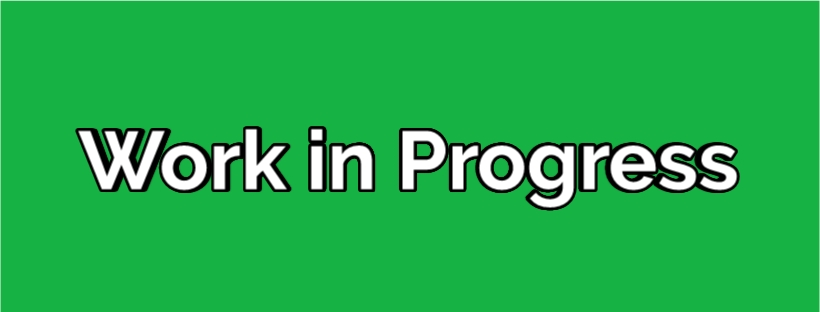